# ARIMA Forecasting with Housing Sales Prices
Wesley Stanis

In [1]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.stattools import acf, pacf
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


In [2]:
#This is my directory
os.chdir('C:\\Users\\Wes\\Desktop\\Datasets')

In [3]:
df = pd.read_csv("Sale_Prices_Zillow_ZipCode.csv",encoding='latin-1')

In [4]:
df.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,913100.0,1073400.0,1040500.0,1218200.0,1018100.0,1052700.0,862600.0,1005000.0,914700.0,880300.0
1,84654,60657,Illinois,2,373100.0,389100.0,390900.0,394600.0,392900.0,378600.0,...,440800.0,417500.0,377000.0,372500.0,397400.0,419100.0,424200.0,415500.0,400400.0,396300.0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,...,1263400.0,1223400.0,1275300.0,1146200.0,1241400.0,1149000.0,1142300.0,1043800.0,977500.0,1000100.0
3,91982,77494,Texas,4,232200.0,241600.0,243800.0,256600.0,253600.0,257600.0,...,333000.0,328000.0,331000.0,333400.0,329000.0,320400.0,314300.0,316000.0,311600.0,NaN
4,84616,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,...,549100.0,528500.0,512600.0,497800.0,485000.0,490500.0,468000.0,474300.0,462300.0,523500.0


In [5]:
df.isnull().sum()

RegionID         0
RegionName       0
StateName        0
SizeRank         0
2008-03       4063
2008-04       4063
2008-05       4063
2008-06       4057
2008-07       4047
2008-08       4042
2008-09       4032
2008-10       4031
2008-11       4029
2008-12       4028
2009-01       4025
2009-02       4013
2009-03       3994
2009-04       3941
2009-05       3898
2009-06       3857
2009-07       3827
2009-08       3799
2009-09       3753
2009-10       3746
2009-11       3735
2009-12       3725
2010-01       3714
2010-02       3696
2010-03       3683
2010-04       3648
              ... 
2017-06        170
2017-07        128
2017-08         73
2017-09         36
2017-10         11
2017-11          0
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
2018-05          0
2018-06          0
2018-07          0
2018-08          0
2018-09          0
2018-10          0
2018-11          0
2018-12          0
2019-01          1
2019-02          1
2019-03     

In [6]:
df.shape

(6508, 145)

In [7]:
#df.dropna() this drops nan values in rows

In [8]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [9]:
#we are taking data to start from 2013 as dates prior have NaN values in the cities we will be targeting
df.drop(df.iloc[:, 3:61], inplace = True, axis = 1)

In [10]:
df.head()

,RegionName,StateName,SizeRank,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,913100.0,1073400.0,1040500.0,1218200.0,1018100.0,1052700.0,862600.0,1005000.0,914700.0,880300.0
1,60657,Illinois,2,330900.0,346900.0,356200.0,355500.0,351700.0,356500.0,367500.0,...,440800.0,417500.0,377000.0,372500.0,397400.0,419100.0,424200.0,415500.0,400400.0,396300.0
2,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1263400.0,1223400.0,1275300.0,1146200.0,1241400.0,1149000.0,1142300.0,1043800.0,977500.0,1000100.0
3,77494,Texas,4,249700.0,240400.0,249200.0,254200.0,264500.0,268100.0,271500.0,...,333000.0,328000.0,331000.0,333400.0,329000.0,320400.0,314300.0,316000.0,311600.0,NaN
4,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,549100.0,528500.0,512600.0,497800.0,485000.0,490500.0,468000.0,474300.0,462300.0,523500.0


In [11]:
df.isnull().sum()

RegionName       0
StateName        0
SizeRank         0
2013-01       2441
2013-02       2402
2013-03       2353
2013-04       2277
2013-05       2209
2013-06       2148
2013-07       2102
2013-08       2063
2013-09       2032
2013-10       2003
2013-11       1987
2013-12       1964
2014-01       1947
2014-02       1930
2014-03       1901
2014-04       1855
2014-05       1764
2014-06       1698
2014-07       1655
2014-08       1611
2014-09       1564
2014-10       1540
2014-11       1518
2014-12       1485
2015-01       1462
2015-02       1432
2015-03       1395
              ... 
2017-06        170
2017-07        128
2017-08         73
2017-09         36
2017-10         11
2017-11          0
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
2018-05          0
2018-06          0
2018-07          0
2018-08          0
2018-09          0
2018-10          0
2018-11          0
2018-12          0
2019-01          1
2019-02          1
2019-03     

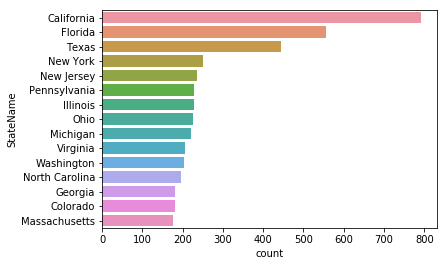

In [12]:
StateFreq = df['StateName'].value_counts()
TopStateFreqs = StateFreq.iloc[:15]
sns.countplot(y='StateName', data=df, order=TopStateFreqs.index)

In [13]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [14]:
CA = df.loc[(df['StateName'] == 'california')]

In [15]:
#zip codes we are targeting
ts = df.loc[df['RegionName'].isin(['93010','93012','91320','91360','91361','91362'])]


In [16]:
ts

,RegionName,StateName,SizeRank,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
1246,93010,california,1247,436300.0,432100.0,429200.0,439300.0,446600.0,456800.0,454000.0,...,647000.0,638600.0,630300.0,592300.0,583800.0,578400.0,589700.0,594200.0,623700.0,640500.0
1606,91320,california,1607,519100.0,507500.0,494100.0,547700.0,559600.0,577700.0,564900.0,...,692000.0,695600.0,703600.0,723200.0,704100.0,711700.0,704400.0,723500.0,725400.0,726900.0
1806,91360,california,1807,453400.0,465300.0,472400.0,482500.0,495400.0,502900.0,506300.0,...,688700.0,694100.0,693800.0,692600.0,697600.0,709600.0,698600.0,685600.0,692100.0,687100.0
2118,93012,california,2119,389800.0,422800.0,468000.0,474800.0,436700.0,421100.0,436400.0,...,564700.0,563600.0,557000.0,579000.0,577200.0,577200.0,582700.0,584300.0,582500.0,578800.0
2120,91362,california,2121,605800.0,596000.0,634200.0,635000.0,632500.0,639800.0,654300.0,...,788800.0,810100.0,778800.0,814700.0,799200.0,808700.0,762000.0,744600.0,786200.0,865000.0
4523,91361,california,4524,737600.0,743900.0,752600.0,734600.0,799800.0,808000.0,839200.0,...,1203400.0,1113100.0,1105200.0,959800.0,968100.0,946900.0,1016600.0,1063500.0,1093000.0,1160500.0


In [17]:
ts.drop(ts.columns[0:3], axis = 1, inplace = True) 

C:\Users\Wes\Anaconda37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
tsdata = ts.transpose()



In [19]:
tsdata.head()

,1246,1606,1806,2118,2120,4523
2013-01,436300.0,519100.0,453400.0,389800.0,605800.0,737600.0
2013-02,432100.0,507500.0,465300.0,422800.0,596000.0,743900.0
2013-03,429200.0,494100.0,472400.0,468000.0,634200.0,752600.0
2013-04,439300.0,547700.0,482500.0,474800.0,635000.0,734600.0
2013-05,446600.0,559600.0,495400.0,436700.0,632500.0,799800.0


In [20]:
tsdata.describe()

,1246,1606,1806,2118,2120,4523
count,83,83,83,83,83,83
unique,82,82,83,81,82,83
top,565100.0,718300,568600.0,577200.0,700100.0,764800.0
freq,2,2,1,2,2,1


In [21]:
#creating a time range for an index
index_ = pd.date_range('2013-01', periods = 83, freq ='M')

In [22]:
tsdata.index = index_

In [23]:
tsdata.columns = ['zip_93010', 'zip_91320', 'zip_91360', 'zip_93012', 'zip_91362', 'zip_91361']

In [24]:
tsdata.tail()

,zip_93010,zip_91320,zip_91360,zip_93012,zip_91362,zip_91361
2019-07-31,578400.0,711700.0,709600.0,577200.0,808700.0,946900.0
2019-08-31,589700.0,704400.0,698600.0,582700.0,762000.0,1016600.0
2019-09-30,594200.0,723500.0,685600.0,584300.0,744600.0,1063500.0
2019-10-31,623700.0,725400.0,692100.0,582500.0,786200.0,1093000.0
2019-11-30,640500.0,726900.0,687100.0,578800.0,865000.0,1160500.0


In [25]:
tsdata.dtypes

zip_93010    object
zip_91320    object
zip_91360    object
zip_93012    object
zip_91362    object
zip_91361    object
dtype: object

In [26]:
#changing data to numeric
tsdata = tsdata.apply(pd.to_numeric)

C:\Users\Wes\Anaconda37\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\Wes\Anaconda37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


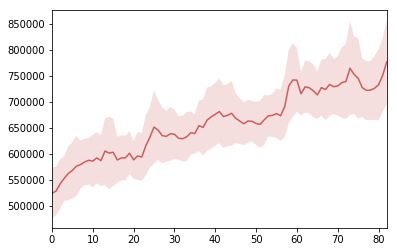

In [27]:
sns.tsplot([tsdata.zip_93010, tsdata.zip_91320, tsdata.zip_91360, tsdata.zip_93012, tsdata.zip_91362, tsdata.zip_91361],
          color="indianred")

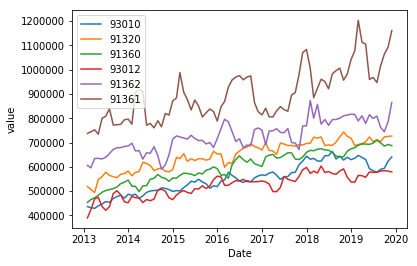

In [28]:
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(tsdata)
plt.gca().legend(('93010','91320','91360','93012','91362','91361'))

In [29]:
#rolling stats. 12 is becuase this data is monthly
rolling_mean = tsdata.rolling(window = 12).mean()
rolling_std = tsdata.rolling(window = 12).std()
print(rolling_mean, rolling_std)

                zip_93010      zip_91320      zip_91360      zip_93012  \
2013-01-31            NaN            NaN            NaN            NaN   
2013-02-28            NaN            NaN            NaN            NaN   
2013-03-31            NaN            NaN            NaN            NaN   
2013-04-30            NaN            NaN            NaN            NaN   
2013-05-31            NaN            NaN            NaN            NaN   
2013-06-30            NaN            NaN            NaN            NaN   
2013-07-31            NaN            NaN            NaN            NaN   
2013-08-31            NaN            NaN            NaN            NaN   
2013-09-30            NaN            NaN            NaN            NaN   
2013-10-31            NaN            NaN            NaN            NaN   
2013-11-30            NaN            NaN            NaN            NaN   
2013-12-31  456933.333333  550816.666667  501575.000000  452916.666667   
2014-01-31  460816.666667  554516.6666

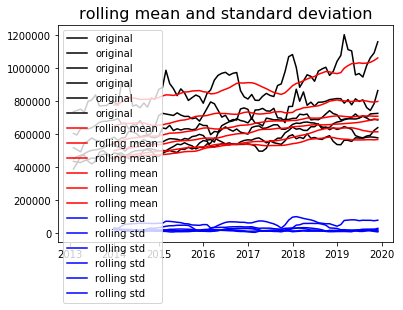

In [30]:
original_data = plt.plot(tsdata, color = 'black', label = 'original')
mean = plt.plot(rolling_mean, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

#std appears somewhat stationary

In [31]:
#dickey fuller test to look for seasonality
print('dickey-fuller test for 93010:')
dickey_fuller_test = adfuller(tsdata['zip_93010'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91320:')
dickey_fuller_test = adfuller(tsdata['zip_91320'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91360:')
dickey_fuller_test = adfuller(tsdata['zip_91360'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 93012:')
dickey_fuller_test = adfuller(tsdata['zip_93012'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91362:')
dickey_fuller_test = adfuller(tsdata['zip_91362'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91361:')
dickey_fuller_test = adfuller(tsdata['zip_91361'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

#checking test statistic for stationarity

dickey-fuller test for 93010:
Test Statistic                 -1.267477
p-value                         0.643917
#lags used                      8.000000
number of observations used    74.000000
critical value (1%)            -3.521980
critical value (5%)            -2.901470
critical value (10%)           -2.588072
dtype: float64
dickey-fuller test for 91320:
Test Statistic                 -1.964990
p-value                         0.302132
#lags used                      7.000000
number of observations used    75.000000
critical value (1%)            -3.520713
critical value (5%)            -2.900925
critical value (10%)           -2.587781
dtype: float64
dickey-fuller test for 91360:
Test Statistic                 -1.583370
p-value                         0.491942
#lags used                     12.000000
number of observations used    70.000000
critical value (1%)            -3.527426
critical value (5%)            -2.903811
critical value (10%)           -2.589320
dtype: float64
dick

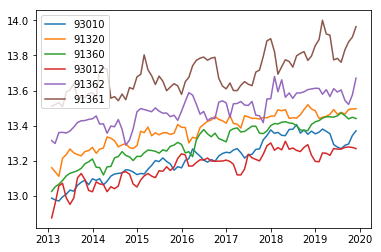

In [32]:
tsdata_log = np.log(tsdata)
plt.plot(tsdata_log)
plt.gca().legend(('93010','91320','91360','93012','91362','91361'))

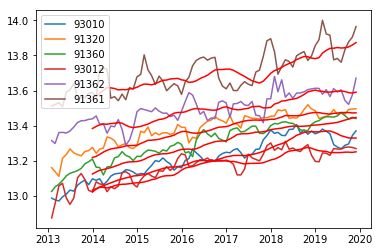

In [33]:
MAlog = tsdata_log.rolling(window=12).mean()
#MSDlog = tsdata_log.rolling(window=12).std()
plt.plot(tsdata_log)
plt.plot(MAlog, color ='red')
plt.gca().legend(('93010','91320','91360','93012','91362','91361'))
#plotted with moving average

In [34]:
tslog_MAdiff = tsdata_log - MAlog


In [35]:
#drops first 11
tslog_MAdiff.dropna(inplace=True)


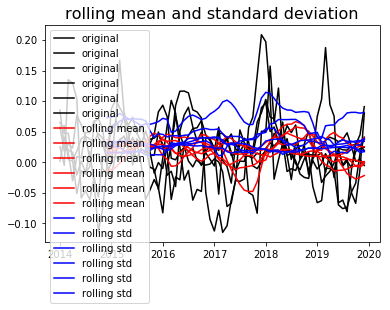

In [36]:
rolling_mean = tslog_MAdiff.rolling(window = 12).mean()
rolling_std = tslog_MAdiff.rolling(window = 12).std()
original_data = plt.plot(tslog_MAdiff, color = 'black', label = 'original')
mean = plt.plot(rolling_mean, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)
#looks more stationary this way

In [37]:
print('dickey-fuller test for 93010:')
dickey_fuller_test = adfuller(tslog_MAdiff['zip_93010'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91320:')
dickey_fuller_test = adfuller(tslog_MAdiff['zip_91320'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91360:')
dickey_fuller_test = adfuller(tslog_MAdiff['zip_91360'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 93012:')
dickey_fuller_test = adfuller(tslog_MAdiff['zip_93012'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91362:')
dickey_fuller_test = adfuller(tslog_MAdiff['zip_91362'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

print('dickey-fuller test for 91361:')
dickey_fuller_test = adfuller(tslog_MAdiff['zip_91361'], autolag = 'AIC')
dickey_fuller_results = pd.Series(dickey_fuller_test[0:4], index =['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dickey_fuller_test[4].items():
	dickey_fuller_results['critical value (%s)'%key] = value
print(dickey_fuller_results)

dickey-fuller test for 93010:
Test Statistic                 -2.866459
p-value                         0.049390
#lags used                     11.000000
number of observations used    60.000000
critical value (1%)            -3.544369
critical value (5%)            -2.911073
critical value (10%)           -2.593190
dtype: float64
dickey-fuller test for 91320:
Test Statistic                 -3.455292
p-value                         0.009212
#lags used                      3.000000
number of observations used    68.000000
critical value (1%)            -3.530399
critical value (5%)            -2.905087
critical value (10%)           -2.590001
dtype: float64
dickey-fuller test for 91360:
Test Statistic                 -2.751164
p-value                         0.065595
#lags used                      6.000000
number of observations used    65.000000
critical value (1%)            -3.535217
critical value (5%)            -2.907154
critical value (10%)           -2.591103
dtype: float64
dick

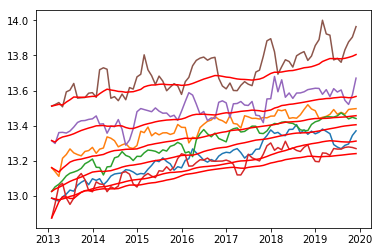

In [38]:
Weighted_tsdata = tsdata_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(tsdata_log)
plt.plot(Weighted_tsdata, color='red')

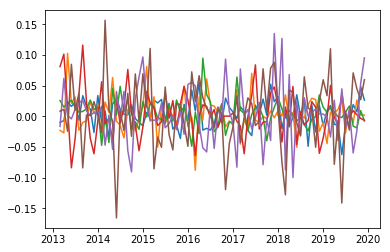

In [39]:
tsdata_shift = tsdata_log - tsdata_log.shift()
tsdata_shift.dropna(inplace=True)

plt.plot(tsdata_shift)

In [40]:
decompose = seasonal_decompose(tsdata_log)
trend = decompose.trend
seasonality = decompose.seasonal
residuals = decompose.resid

C:\Users\Wes\Anaconda37\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


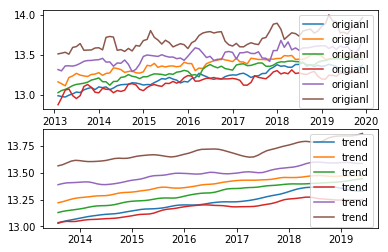

In [41]:
plt.subplot(211)
plt.plot(tsdata_log, label='origianl')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(trend, label='trend')
plt.legend(loc='best')

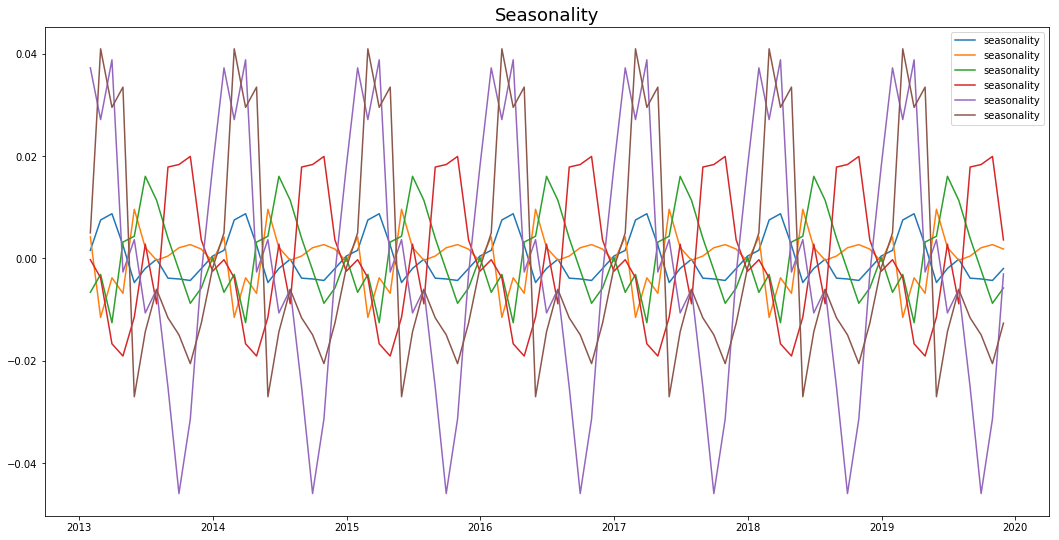

In [42]:
plt.figure(figsize=(18,9))
plt.plot(seasonality, label='seasonality')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

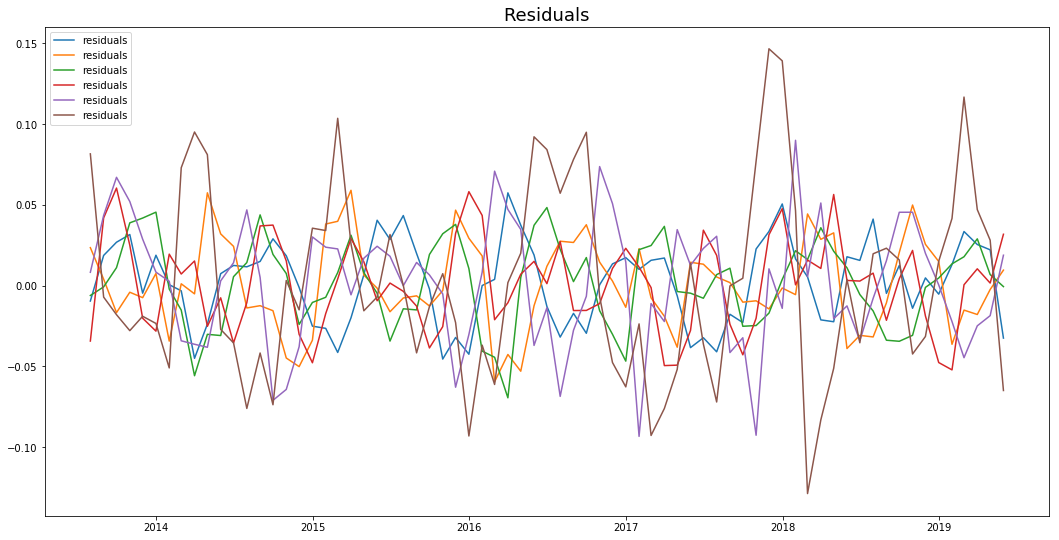

In [43]:
plt.figure(figsize=(18,9))
plt.plot(residuals, label='residuals')
plt.title('Residuals', fontsize=18)
plt.legend(loc='best')

In [44]:
#creating time series for each zip code
#we are doing this just to remane each zip code with the geographical city area. 
#An example to perform some of these models would be... tsdata_log['zip_93010']



West_Cam = tsdata[['zip_93010']].copy()
NewburryPark_West_TO = tsdata[['zip_91320']].copy()
NE_TO = tsdata[['zip_91360']].copy()
East_Cam = tsdata[['zip_93012']].copy()
West_TO_WestLake = tsdata[['zip_91362']].copy()
WestLake_South_TO = tsdata[['zip_91361']].copy()

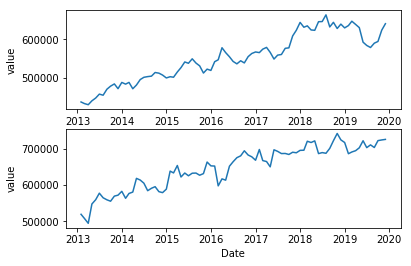

In [45]:
plt.subplot(211)
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(West_Cam)

plt.subplot(212)
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(NewburryPark_West_TO)


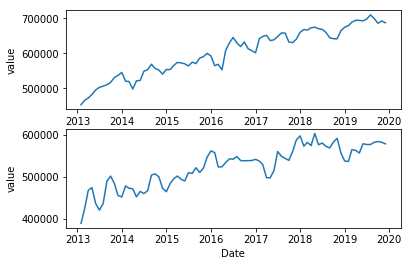

In [46]:
plt.subplot(211)
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(NE_TO)

plt.subplot(212)
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(East_Cam)

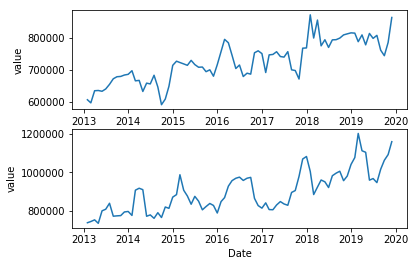

In [47]:
plt.subplot(211)
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(West_TO_WestLake)

plt.subplot(212)
plt.xlabel('Date')
plt.ylabel('value')
plt.plot(WestLake_South_TO)

In [48]:
rolling_mean1 = West_Cam.rolling(window = 12).mean()
rolling_std1 = West_Cam.rolling(window = 12).std()

rolling_mean2 = NewburryPark_West_TO.rolling(window = 12).mean()
rolling_std2 = NewburryPark_West_TO.rolling(window = 12).std()

rolling_mean3 = NE_TO.rolling(window = 12).mean()
rolling_std3 = NE_TO.rolling(window = 12).std()

rolling_mean4 = East_Cam.rolling(window = 12).mean()
rolling_std4 = East_Cam.rolling(window = 12).std()

rolling_mean5 = West_TO_WestLake.rolling(window = 12).mean()
rolling_std5 = West_TO_WestLake.rolling(window = 12).std()

rolling_mean6 = WestLake_South_TO.rolling(window = 12).mean()
rolling_std6 = WestLake_South_TO.rolling(window = 12).std()


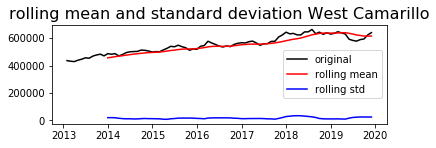

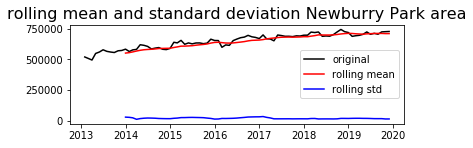

In [49]:
plt.subplot(211)
original_data1 = plt.plot(West_Cam, color = 'black', label = 'original')
mean = plt.plot(rolling_mean1, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std1, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation West Camarillo', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

plt.subplot(212)
original_data1 = plt.plot(NewburryPark_West_TO, color = 'black', label = 'original')
mean = plt.plot(rolling_mean2, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std2, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation Newburry Park area', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

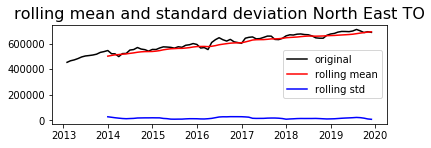

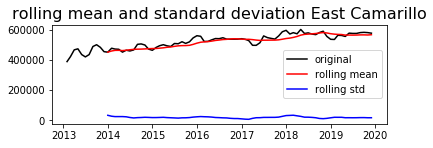

In [50]:
plt.subplot(211)
original_data1 = plt.plot(NE_TO, color = 'black', label = 'original')
mean = plt.plot(rolling_mean3, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std3, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation North East TO', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

plt.subplot(212)
original_data1 = plt.plot(East_Cam, color = 'black', label = 'original')
mean = plt.plot(rolling_mean4, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std4, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation East Camarillo', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

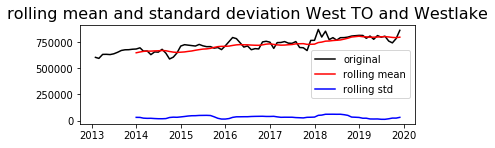

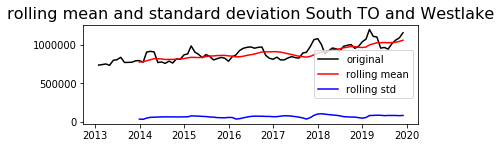

In [51]:
plt.subplot(211)
original_data1 = plt.plot(West_TO_WestLake, color = 'black', label = 'original')
mean = plt.plot(rolling_mean5, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std5, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation West TO and Westlake', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

plt.subplot(212)
original_data1 = plt.plot(WestLake_South_TO, color = 'black', label = 'original')
mean = plt.plot(rolling_mean6, color = 'red', label = 'rolling mean')
std = plt.plot(rolling_std6, color = 'blue', label = 'rolling std')
plt.title('rolling mean and standard deviation South TO and Westlake', fontsize=16)
plt.legend(loc='best')
plt.show(block = False)

In [52]:
West_Cam_log = np.log(West_Cam)
NewburryPark_West_TO_log = np.log(NewburryPark_West_TO)
NE_TO_log = np.log(NE_TO)
East_Cam_log = np.log(East_Cam)
West_TO_WestLake_log = np.log(West_TO_WestLake)
WestLake_South_TO_log = np.log(WestLake_South_TO)


In [53]:
movingAverageWest_Cam = West_Cam_log.rolling(window=12).mean()
movingAverageNewburryPark_West_TO = NewburryPark_West_TO_log.rolling(window=12).mean()
movingAverageNE_TO = NE_TO_log.rolling(window=12).mean()
movingAverageEast_Cam = East_Cam_log.rolling(window=12).mean()
movingAverageWest_TO_WestLake = West_TO_WestLake_log.rolling(window=12).mean()
movingAverageWestLake_South_TO = WestLake_South_TO_log.rolling(window=12).mean()


In [54]:
West_Cam_logMinusMovingAverage = West_Cam_log - movingAverageWest_Cam
NewburryPark_West_TO_logMinusMovingAverage = NewburryPark_West_TO_log - movingAverageNewburryPark_West_TO
NE_TO_logMinusMovingAverage = NE_TO_log - movingAverageNE_TO
East_Cam_logMinusMovingAverage = East_Cam_log - movingAverageEast_Cam
West_TO_WestLake_logMinusMovingAverage = West_TO_WestLake_log - movingAverageWest_TO_WestLake
WestLake_South_TO_logMinusMovingAverage = WestLake_South_TO_log - movingAverageWestLake_South_TO



West_Cam_logMinusMovingAverage.dropna(inplace=True)
NewburryPark_West_TO_logMinusMovingAverage.dropna(inplace=True)
NE_TO_logMinusMovingAverage.dropna(inplace=True)
East_Cam_logMinusMovingAverage.dropna(inplace=True)
West_TO_WestLake_logMinusMovingAverage.dropna(inplace=True)
WestLake_South_TO_logMinusMovingAverage.dropna(inplace=True)


In [55]:
#weighted averages with decay

EXPWeighted_West_Cam = West_Cam_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
EXPWeighted_NewburryPark_West_TO = NewburryPark_West_TO_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
EXPWeighted_NE_TO = NE_TO_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
EXPWeighted_East_Cam = East_Cam_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
EXPWeighted_West_TO_WestLake = West_TO_WestLake_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
EXPWeighted_WestLake_South_TO = WestLake_South_TO_log.ewm(halflife=12, min_periods=0, adjust=True).mean()


In [56]:
West_Cam_shift = West_Cam_log - West_Cam_log.shift()
West_Cam_shift.dropna(inplace=True)

NewburryPark_West_TO_shift = NewburryPark_West_TO_log - NewburryPark_West_TO_log.shift()
NewburryPark_West_TO_shift.dropna(inplace=True)

NE_TO_shift = NE_TO_log - NE_TO_log.shift()
NE_TO_shift.dropna(inplace=True)

East_Cam_shift = East_Cam_log - East_Cam_log.shift()
East_Cam_shift.dropna(inplace=True)

West_TO_WestLake_shift = West_TO_WestLake_log - West_TO_WestLake_log.shift()
West_TO_WestLake_shift.dropna(inplace=True)

WestLake_South_TO_shift = WestLake_South_TO_log - WestLake_South_TO_log.shift()
WestLake_South_TO_shift.dropna(inplace=True)

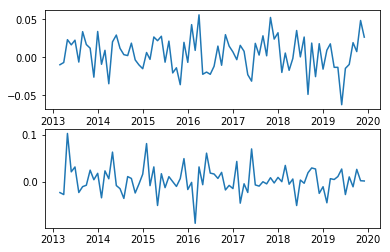

In [57]:
plt.subplot(211)
plt.plot(West_Cam_shift)

plt.subplot(212)
plt.plot(NewburryPark_West_TO_shift)

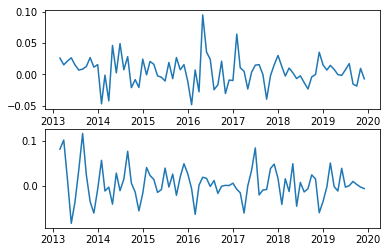

In [58]:
plt.subplot(211)
plt.plot(NE_TO_shift)

plt.subplot(212)
plt.plot(East_Cam_shift)

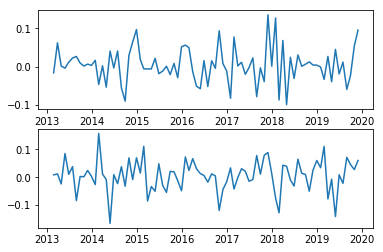

In [59]:
plt.subplot(211)
plt.plot(West_TO_WestLake_shift)

plt.subplot(212)
plt.plot(WestLake_South_TO_shift)

In [60]:
decompose1 = seasonal_decompose(West_Cam_log)
trend1 = decompose1.trend
seasonality1 = decompose1.seasonal
residuals1 = decompose1.resid

decompose2 = seasonal_decompose(NewburryPark_West_TO_log)
trend2 = decompose2.trend
seasonality2 = decompose2.seasonal
residuals2 = decompose2.resid

decompose3 = seasonal_decompose(NE_TO_log)
trend3 = decompose3.trend
seasonality3 = decompose3.seasonal
residuals3 = decompose3.resid

decompose4 = seasonal_decompose(East_Cam_log)
trend4 = decompose4.trend
seasonality4 = decompose4.seasonal
residuals4 = decompose4.resid

decompose5 = seasonal_decompose(West_TO_WestLake_log)
trend5 = decompose5.trend
seasonality5 = decompose5.seasonal
residuals5 = decompose5.resid

decompose6 = seasonal_decompose(WestLake_South_TO_log)
trend6 = decompose6.trend
seasonality6 = decompose6.seasonal
residuals6 = decompose6.resid

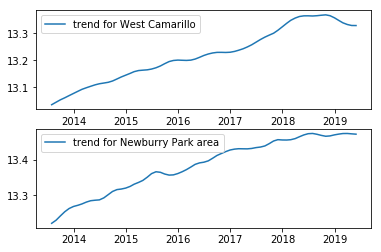

In [61]:
plt.subplot(211)
plt.plot(trend1, label='trend for West Camarillo')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(trend2, label='trend for Newburry Park area')
plt.legend(loc='best')

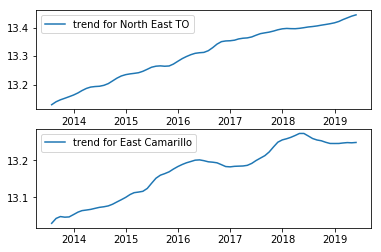

In [62]:
plt.subplot(211)
plt.plot(trend3, label='trend for North East TO')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(trend4, label='trend for East Camarillo')
plt.legend(loc='best')

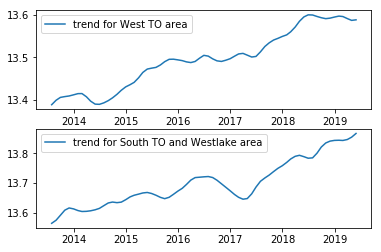

In [63]:
plt.subplot(211)
plt.plot(trend5, label='trend for West TO area')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(trend6, label='trend for South TO and Westlake area')
plt.legend(loc='best')

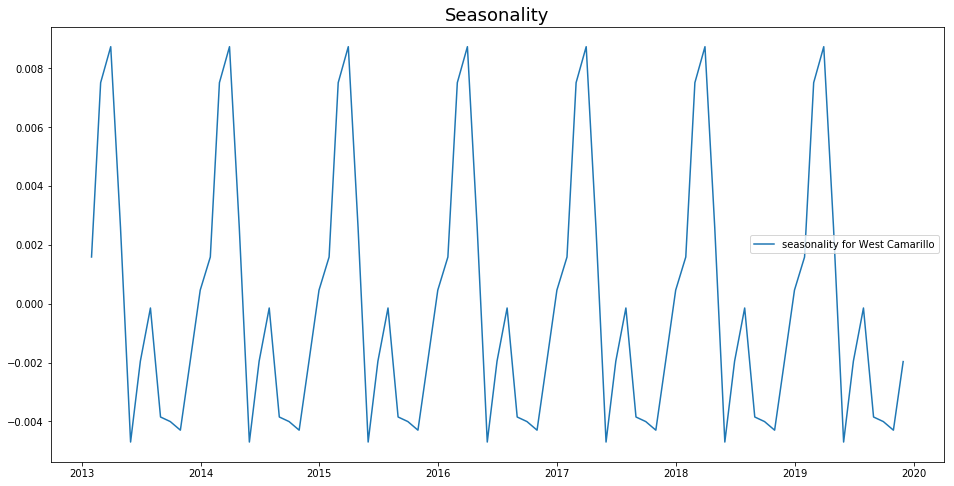

In [64]:
plt.figure(figsize=(16,8))
plt.plot(seasonality1, label='seasonality for West Camarillo')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

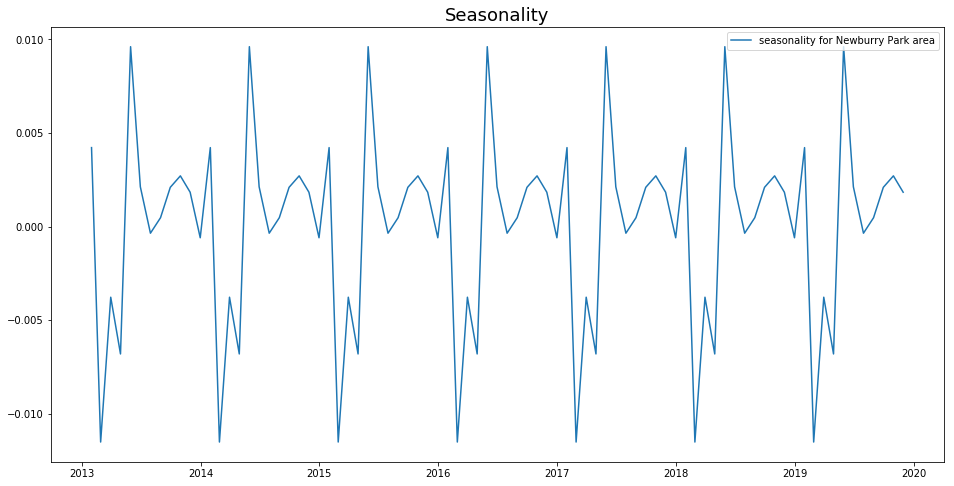

In [65]:
plt.figure(figsize=(16,8))
plt.plot(seasonality2, label='seasonality for Newburry Park area')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

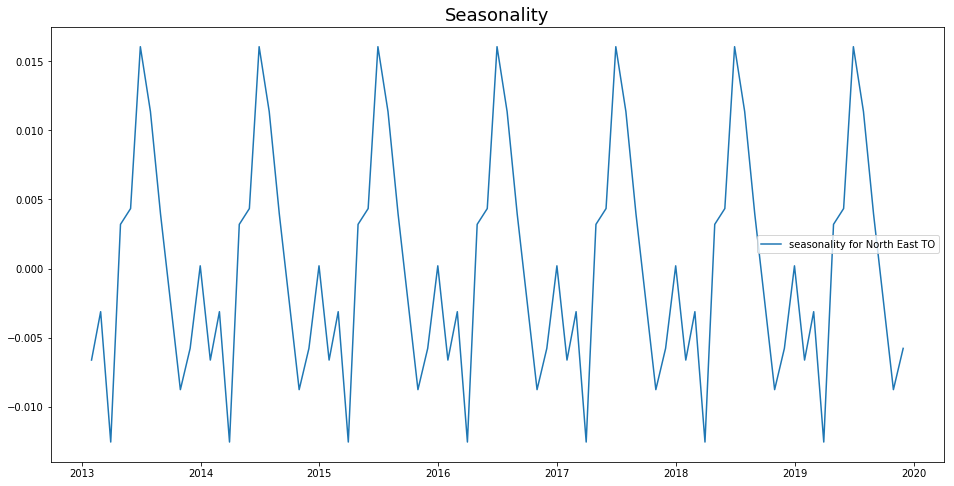

In [66]:
plt.figure(figsize=(16,8))
plt.plot(seasonality3, label='seasonality for North East TO')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

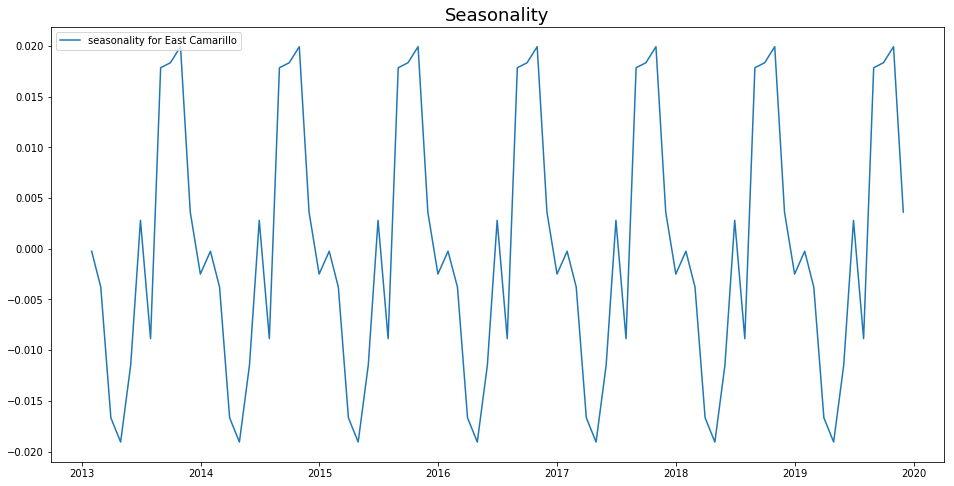

In [67]:
plt.figure(figsize=(16,8))
plt.plot(seasonality4, label='seasonality for East Camarillo')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

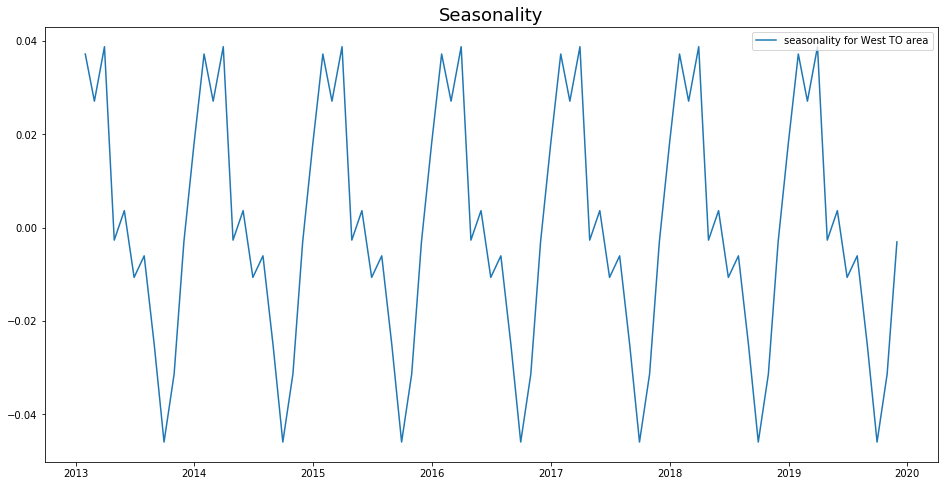

In [68]:
plt.figure(figsize=(16,8))
plt.plot(seasonality5, label='seasonality for West TO area')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

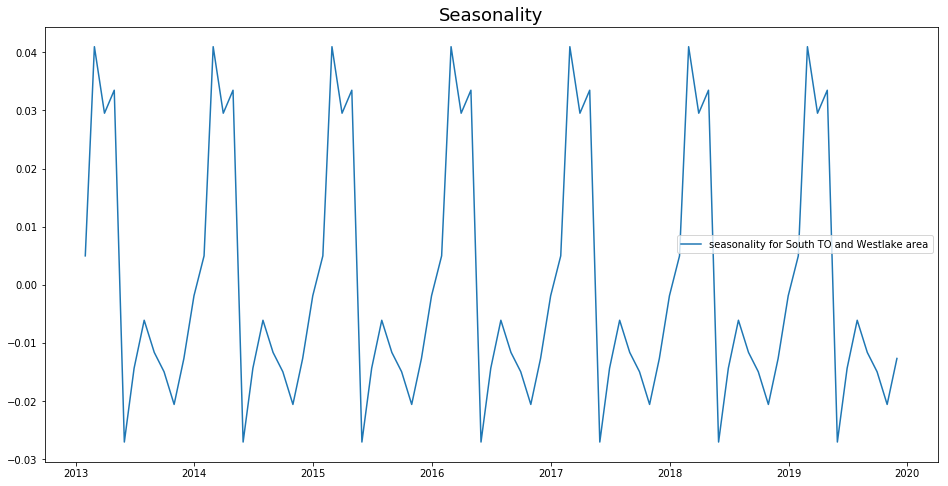

In [69]:
plt.figure(figsize=(16,8))
plt.plot(seasonality6, label='seasonality for South TO and Westlake area')
plt.title('Seasonality', fontsize=18)
plt.legend(loc='best')

Seasonality is different for each area. Newbury Park has interesting seasonality with multiple spikes.

In [70]:
West_Cam_acf = acf(West_Cam_shift, nlags = 48)
West_Cam_pacf = pacf(West_Cam_shift, nlags = 48, method ='ols')

NewburryPark_West_TO_acf = acf(NewburryPark_West_TO_shift, nlags = 48)
NewburryPark_West_TO_pacf = pacf(NewburryPark_West_TO_shift, nlags = 48, method ='ols')

NE_TO_acf = acf(NE_TO_shift, nlags = 48)
NE_TO_pacf = pacf(NE_TO_shift, nlags = 48, method ='ols')

East_Cam_acf = acf(East_Cam_shift, nlags = 48)
East_Cam_pacf = pacf(East_Cam_shift, nlags = 48, method ='ols')

West_TO_WestLake_acf = acf(West_TO_WestLake_shift, nlags = 48)
West_TO_WestLake_pacf = pacf(West_TO_WestLake_shift, nlags = 48, method ='ols')

WestLake_South_TO_acf = acf(WestLake_South_TO_shift, nlags = 48)
WestLake_South_TO_pacf = pacf(WestLake_South_TO_shift, nlags = 48, method ='ols')

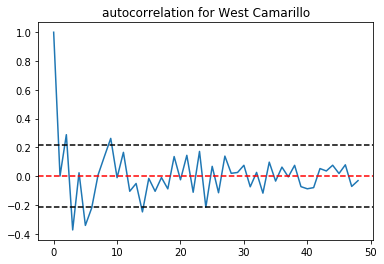

In [71]:
plt.plot(West_Cam_acf)
plt.title('autocorrelation for West Camarillo')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(West_Cam_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(West_Cam_shift)),linestyle='--',color='black')

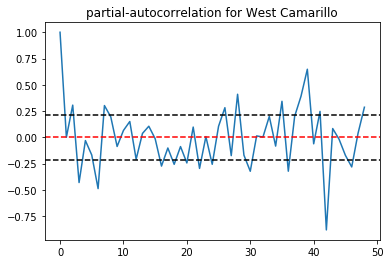

In [72]:
plt.plot(West_Cam_pacf)
plt.title('partial-autocorrelation for West Camarillo')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(NewburryPark_West_TO_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(NewburryPark_West_TO_shift)),linestyle='--',color='black')

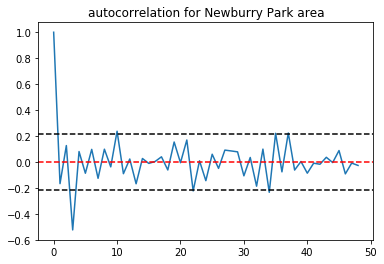

In [73]:
plt.plot(NewburryPark_West_TO_acf)
plt.title('autocorrelation for Newburry Park area')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(West_Cam_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(West_Cam_shift)),linestyle='--',color='black')

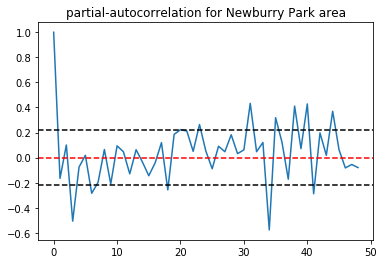

In [74]:
plt.plot(NewburryPark_West_TO_pacf)
plt.title('partial-autocorrelation for Newburry Park area')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(NewburryPark_West_TO_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(NewburryPark_West_TO_shift)),linestyle='--',color='black')

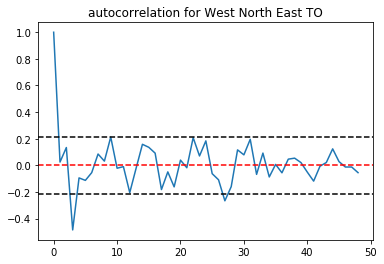

In [75]:
plt.plot(NE_TO_acf)
plt.title('autocorrelation for North East TO')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(NE_TO_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(NE_TO_shift)),linestyle='--',color='black')

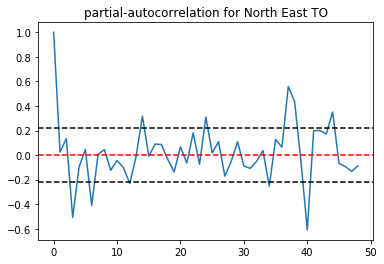

In [76]:
plt.plot(NE_TO_pacf)
plt.title('partial-autocorrelation for North East TO')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(NE_TO_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(NE_TO_shift)),linestyle='--',color='black')

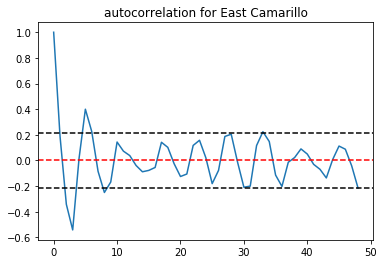

In [77]:
plt.plot(East_Cam_acf)
plt.title('autocorrelation for East Camarillo')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(East_Cam_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(East_Cam_shift)),linestyle='--',color='black')

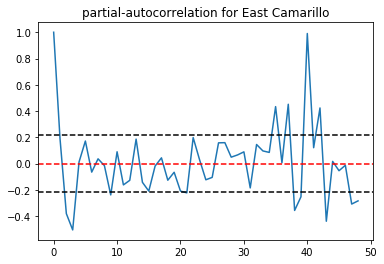

In [78]:
plt.plot(East_Cam_pacf)
plt.title('partial-autocorrelation for East Camarillo')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(East_Cam_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(East_Cam_shift)),linestyle='--',color='black')

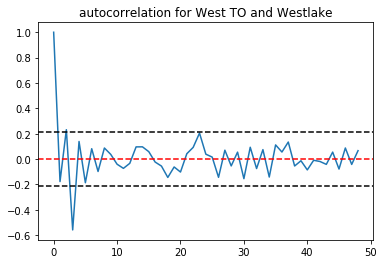

In [79]:
plt.plot(West_TO_WestLake_acf)
plt.title('autocorrelation for West TO and Westlake')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(West_TO_WestLake_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(West_TO_WestLake_shift)),linestyle='--',color='black')

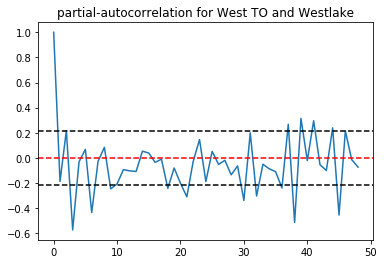

In [80]:
plt.plot(West_TO_WestLake_pacf)
plt.title('partial-autocorrelation for West TO and Westlake')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(West_TO_WestLake_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(West_TO_WestLake_shift)),linestyle='--',color='black')

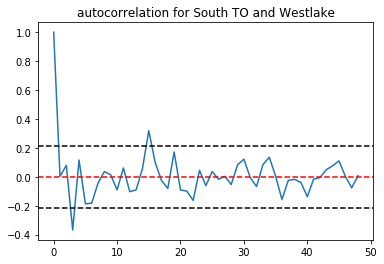

In [81]:
plt.plot(WestLake_South_TO_acf)
plt.title('autocorrelation for South TO and Westlake')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(WestLake_South_TO_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(WestLake_South_TO_shift)),linestyle='--',color='black')

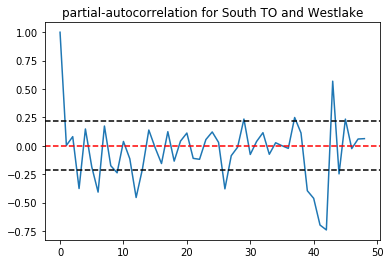

In [82]:
plt.plot(WestLake_South_TO_pacf)
plt.title('partial-autocorrelation for South TO and Westlake')
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(WestLake_South_TO_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(WestLake_South_TO_shift)),linestyle='--',color='black')

C:\Users\Wes\Anaconda37\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


South TO and WestLake ARIMA


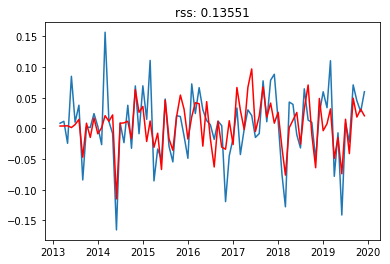

In [141]:

#RSS value(residual sum of squared)
#ARIMA model
#We will change the plug in each city to this model for each area.
model1 = ARIMA(WestLake_South_TO_log, order=(5, 1, 5))
r_ARIMA = model1.fit(disp=-1)
plt.plot(WestLake_South_TO_shift)
plt.plot(r_ARIMA.fittedvalues, color='red')
plt.title('rss: %.5f'% sum((r_ARIMA.fittedvalues-WestLake_South_TO_shift['zip_91361'])**2))
print('South TO and WestLake ARIMA')


In [142]:
ARIMA_Predictions_diff = pd.Series(r_ARIMA.fittedvalues, copy=True)
ARIMA_Predictions_diff_cs = ARIMA_Predictions_diff.cumsum()

In [143]:
ARIMA_log_pred = pd.Series(WestLake_South_TO_log['zip_91361'].iloc[0],index=WestLake_South_TO_log.index)
ARIMA_log_pred = ARIMA_log_pred.add(ARIMA_Predictions_diff_cs,fill_value=0)
ARIMA_log_pred.head()

2013-01-31    13.511157
2013-02-28    13.515111
2013-03-31    13.519160
2013-04-30    13.523494
2013-05-31    13.524988
Freq: M, dtype: float64

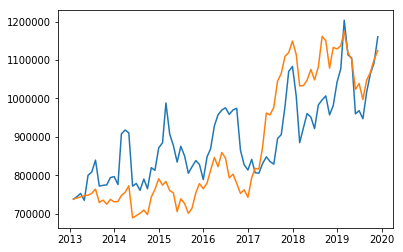

In [144]:
ARIMA_pred = np.exp(ARIMA_log_pred)
plt.plot(WestLake_South_TO)
plt.plot(ARIMA_pred)

In [145]:
#West_Cam.shape

array([1.03916452, 1.05674905, 1.07165191, 1.07209117, 1.07294752,
       1.07302756, 1.07351064, 1.07503292, 1.07539727, 1.07545069,
       1.07570935, 1.07578406, 1.07578424, 1.07578868, 1.07579206,
       1.07579531, 1.07579764, 1.07579772, 1.07579867, 1.0758    ,
       1.0758002 , 1.07580024, 1.07580037, 1.07580042, 1.07580042,
       1.07580042, 1.07580043, 1.07580043, 1.07580043, 1.07580043,
       1.07580044, 1.07580044, 1.07580044, 1.07580044, 1.07580044,
       1.07580044])

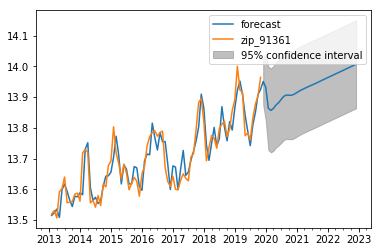

In [146]:
r_ARIMA.plot_predict(1,119)
x=r_ARIMA.forecast(steps=36)
x[1]
len(x[1])
np.exp(x[1])